In [1]:
# ライブラリをインポート

# データ操作と数値計算のため
import pandas as pd
import numpy as np

# データ可視化のため
import matplotlib.pyplot as plt
import seaborn as sns

# 統計モデリングと計量経済分析のため
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col
from rdrobust import rdrobust

# for ignore warning
import warnings
warnings.filterwarnings('ignore')

In [30]:
url = "https://www.fbc.keio.ac.jp/~tyabu/keiryo/election_data.csv"
df = pd.read_csv(url)
df.head()

,myoutcomenext,diff_share
0,0.0,0.061488
1,0.0,-0.061488
2,1.0,0.104870
3,0.0,-0.104870
4,0.0,-0.535721


In [31]:
# 変数の定義 ---------------------------------------------------------------------------
df = df.dropna(subset=['diff_share', 'myoutcomenext'])  # Drop rows with NaN in specific columns
df['W'] = df['diff_share']
df['X'] = (df['W'] >= 0).astype(int)
df['Y'] = df['myoutcomenext'].astype(int)
df['W2'] = df['W'] ** 2
df['W3'] = df['W'] ** 3
df['WX'] = df['W'] * df['X']
df['WX2'] = df['W2'] * df['X']
df['WX3'] = df['W3'] * df['X']
df.head()

,myoutcomenext,diff_share,W,X,Y,W2,W3,WX,WX2,WX3
0,0.0,0.061488,0.061488,1,0,0.003781,0.000232,0.061488,0.003781,0.000232
1,0.0,-0.061488,-0.061488,0,0,0.003781,-0.000232,-0.000000,0.000000,-0.000000
2,1.0,0.104870,0.104870,1,1,0.010998,0.001153,0.104870,0.010998,0.001153
3,0.0,-0.104870,-0.104870,0,0,0.010998,-0.001153,-0.000000,0.000000,-0.000000
4,0.0,-0.535721,-0.535721,0,0,0.286997,-0.153750,-0.000000,0.000000,-0.000000


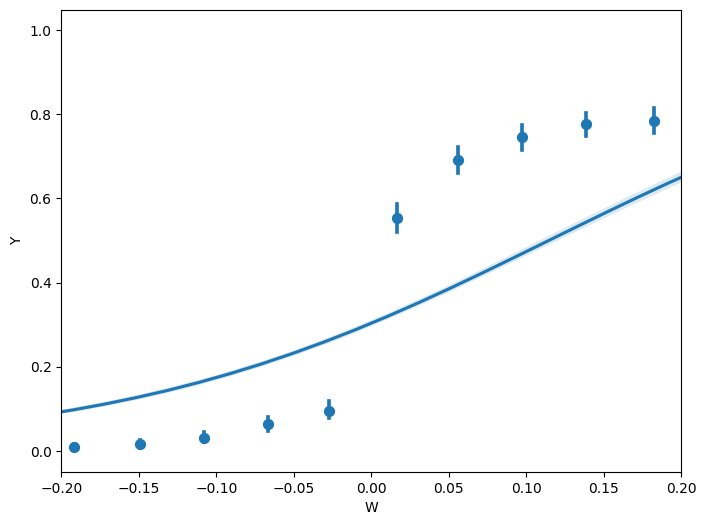

In [17]:
# 14.4節の推定結果 ---------------------------------------------------------------------------
plt.figure(figsize=(8, 6))
sns.regplot(x='W', y='Y', data=df, logistic=True, x_bins=30)
plt.xlim(-0.2, 0.2)
plt.show()

In [32]:
# Filter the DataFrame first
filtered_df = df[(df['W'] >= -0.2) & (df['W'] <= 0.2)]

X1 = filtered_df[['X', 'W', 'W2', 'W3', 'WX', 'WX2', 'WX3']]
X1 = sm.add_constant(X1)
model_1 = sm.OLS(filtered_df['Y'], X1).fit()  # Use filtered_df['Y']
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                     1063.
Date:                Wed, 18 Sep 2024   Prob (F-statistic):               0.00
Time:                        14:33:23   Log-Likelihood:                -2770.6
No. Observations:                7692   AIC:                             5557.
Df Residuals:                    7684   BIC:                             5613.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1453      0.023      6.277      0.0

In [33]:
# 練習問題 ---------------------------------------------------------------------------
# Filter the DataFrame first
filtered_df = df[(df['W'] >= -0.15) & (df['W'] <= 0.15)].copy()  # Create a filtered copy

X2 = filtered_df[['X', 'W', 'WX']]
X2 = sm.add_constant(X2)
model_2 = sm.OLS(filtered_df['Y'], X2).fit()  # Use filtered_df['Y']
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.448
Method:                 Least Squares   F-statistic:                     1589.
Date:                Wed, 18 Sep 2024   Prob (F-statistic):               0.00
Time:                        14:33:24   Log-Likelihood:                -2344.6
No. Observations:                5865   AIC:                             4697.
Df Residuals:                    5861   BIC:                             4724.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1172      0.013      8.734      0.0

In [34]:
# バンド幅と乗数を最適に選択するコマンド ---------------------------------------------------------------------------
rd = rdrobust(df['Y'], df['W'], kernel='tri', c=0)
print(rd.summary())

NameError: name 'rdrobust' is not defined

In [ ]:
# 変数の定義 ---------------------------------------------------------------------------
df$W <- df$diff_share
df$X <- as.numeric(df$W >= 0)
df$Y <- as.numeric(df$myoutcomenext)
df <- na.omit(df)

# 14.4節の推定結果 ---------------------------------------------------------------------------
rdplot(
  y = df$Y,
  x = df$W,
  x.lim = c(-0.2, 0.2)
)

df$W2 <- (df$W)^2
df$W3 <- (df$W)^3
df$WX <- (df$W) * (df$X)
df$WX2 <- (df$W2) * (df$X)
df$WX3 <- (df$W3) * (df$X)

model_1 <- lm_robust(
    Y ~ X + W + W2 + W3 + WX + WX2 + WX3,
    data = df,
    subset = (W >= -0.2 & W <= 0.2)
)
summary(model_1)

# 練習問題 ---------------------------------------------------------------------------
model_2 <- lm_robust(
    Y ~ X + W + WX,
    data = df,
    subset = (W >= -0.15 & W <= 0.15)
)
summary(model_2)

# バンド幅と乗数を最適に選択するコマンド ---------------------------------------------------------------------------
rd <- rdrobust(
    df$Y,
    df$W,
    kernel = "tri",
    c = 0
)
summary(rd)